In [62]:
import os
from osgeo import gdal
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.colors import ListedColormap
import numpy as np

In [63]:
%matplotlib inline
os.chdir(r"clipped_nlcd")

In [66]:
images = [i for i in os.listdir() if i.endswith(".tiff")]
images

['NLCD_2001_clipped.tiff', 'NLCD_2004_clipped.tiff', 'NLCD_2006_clipped.tiff', 'NLCD_2008_clipped.tiff', 'NLCD_2011_clipped.tiff', 'NLCD_2013_clipped.tiff', 'NLCD_2016_clipped.tiff', 'NLCD_2019_clipped.tiff']

In [64]:
images[0].replace("clipped", "reclass")

'NLCD_2001_reclass.tiff'

In [65]:
os.path.join(os.getcwd(), "NLCD_Reclass", images[0].replace("clipped", "reclass"))

'C:\\Users\\Research Lab\\Box\\Pratik\\SummerSem\\NLCDHUC8\\NLCD_iiJJeHld15b2ydkZ7bcB\\clipped_nlcd\\NLCD_Reclass\\NLCD_2001_reclass.tiff'

In [141]:
reclassMap = "0 0;1 0;2 0;3 0;4 0;5 0;6 0;7 0;8 0;9 0;10 0;11 3;12 3;13 0;14 0;15 0;16 0;17 0;18 0;19 0;20 0;21 2;22 2;23 2;24 2;25 0;26 0;27 0;28 0;29 0;30 0;31 6;32 0;33 0;34 0;35 0;36 0;37 0;38 0;39 0;40 0;41 4;42 4;43 4;44 0;45 0;46 0;47 0;48 0;49 0;50 0;51 0;52 6;53 0;54 0;55 0;56 0;57 0;58 0;59 0;60 0;61 0;62 0;63 0;64 0;65 0;66 0;67 0;68 0;69 0;70 0;71 6;72 0;73 0;74 0;75 0;76 0;77 0;78 0;79 0;80 0;81 5;82 1;83 0;84 0;85 0;86 0;87 0;88 0;89 0;90 6;91 0;92 0;93 0;94 0;95 6;96 0;97 0;98 0;99 0;100 0;101 0;102 0;103 0;104 0;105 0;106 0;107 0;108 0;109 0;110 0;111 0;112 0;113 0;114 0;115 0;116 0;117 0;118 0;119 0;120 0;121 0;122 0;123 0;124 0;125 0;126 0;127 0;128 0;129 0;130 0;131 0;132 0;133 0;134 0;135 0;136 0;137 0;138 0;139 0;140 0;141 0;142 0;143 0;144 0;145 0;146 0;147 0;148 0;149 0;150 0;151 0;152 0;153 0;154 0;155 0;156 0;157 0;158 0;159 0;160 0;161 0;162 0;163 0;164 0;165 0;166 0;167 0;168 0;169 0;170 0;171 0;172 0;173 0;174 0;175 0;176 0;177 0;178 0;179 0;180 0;181 0;182 0;183 0;184 0;185 0;186 0;187 0;188 0;189 0;190 0;191 0;192 0;193 0;194 0;195 0;196 0;197 0;198 0;199 0;200 0;201 0;202 0;203 0;204 0;205 0;206 0;207 0;208 0;209 0;210 0;211 0;212 0;213 0;214 0;215 0;216 0;217 0;218 0;219 0;220 0;221 0;222 0;223 0;224 0;225 0;226 0;227 0;228 0;229 0;230 0;231 0;232 0;233 0;234 0;235 0;236 0;237 0;238 0;239 0;240 0;241 0;242 0;243 0;244 0;245 0;246 0;247 0;248 0;249 0;250 0;251 0;252 0;253 0;254 0;255 0"

In [134]:
startMap = ";".join([f"{i} 0" for i in range(256)])
recode = "82:1; 21,22,23,24:2; 11,12:3; 41,42,43:4; 81:5; 31,71,52,90,95:6"
codePairs = [[f"{l}: {a[1]}" for l in a[0]] for a in [(ii.split(":")[0].split(","), ii.split(":")[1]) for ii in recode.split("; ")]]
replacements = [item.replace(": ", " ") for b in codePairs for item in b]
for each in replacements:
    startMap = startMap.replace(";"+each[:-1]+"0"+";", ";"+each+";")

In [144]:
xx = startMap.split(";")
yy = reclassMap.split(";")
for i in range(len(xx)):
    if xx[i] != yy[i]: print( (i, xx[i], yy[i]))

In [145]:
def reclassifyNLCD(inputImage):
    print(f"Reclassifying image {inputImage}...\n")
    out_raster = arcpy.sa.Reclassify(inputImage, "Value", startMap , "NODATA")
    outputImage = os.path.join(os.getcwd(), "NLCD_Reclass", inputImage.replace("clipped.tiff", "reclass.tif"))
    print(f"Saving to {outputImage}...\n")
    out_raster.save(outputImage)
    return True

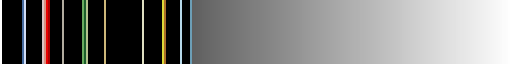

In [69]:
colors = np.array([(0, 0, 0,0) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.274509803921569, 0.419607843137255, 0.623529411764706,1) , (0.819607843137255, 0.870588235294118, 0.972549019607843,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.870588235294118, 0.772549019607843, 0.772549019607843,1) , (0.850980392156863, 0.572549019607843, 0.509803921568627,1) , (0.92156862745098, 0, 0,1) , (0.670588235294118, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.701960784313725, 0.674509803921569, 0.623529411764706,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.407843137254902, 0.670588235294118, 0.372549019607843,1) , (0.109803921568627, 0.372549019607843, 0.172549019607843,1) , (0.709803921568627, 0.772549019607843, 0.56078431372549,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.8, 0.72156862745098, 0.474509803921569,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.874509803921569, 0.874509803921569, 0.76078431372549,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.862745098039216, 0.850980392156863, 0.223529411764706,1) , (0.670588235294118, 0.423529411764706, 0.156862745098039,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.72156862745098, 0.850980392156863, 0.92156862745098,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0, 0, 0,1) , (0.423529411764706, 0.623529411764706, 0.72156862745098,1) , (0.376470588235294, 0.376470588235294, 0.376470588235294,1) , (0.380392156862745, 0.380392156862745, 0.380392156862745,1) , (0.384313725490196, 0.384313725490196, 0.384313725490196,1) , (0.388235294117647, 0.388235294117647, 0.388235294117647,1) , (0.392156862745098, 0.392156862745098, 0.392156862745098,1) , (0.396078431372549, 0.396078431372549, 0.396078431372549,1) , (0.4, 0.4, 0.4,1) , (0.403921568627451, 0.403921568627451, 0.403921568627451,1) , (0.407843137254902, 0.407843137254902, 0.407843137254902,1) , (0.411764705882353, 0.411764705882353, 0.411764705882353,1) , (0.415686274509804, 0.415686274509804, 0.415686274509804,1) , (0.419607843137255, 0.419607843137255, 0.419607843137255,1) , (0.423529411764706, 0.423529411764706, 0.423529411764706,1) , (0.427450980392157, 0.427450980392157, 0.427450980392157,1) , (0.431372549019608, 0.431372549019608, 0.431372549019608,1) , (0.435294117647059, 0.435294117647059, 0.435294117647059,1) , (0.43921568627451, 0.43921568627451, 0.43921568627451,1) , (0.443137254901961, 0.443137254901961, 0.443137254901961,1) , (0.447058823529412, 0.447058823529412, 0.447058823529412,1) , (0.450980392156863, 0.450980392156863, 0.450980392156863,1) , (0.454901960784314, 0.454901960784314, 0.454901960784314,1) , (0.458823529411765, 0.458823529411765, 0.458823529411765,1) , (0.462745098039216, 0.462745098039216, 0.462745098039216,1) , (0.466666666666667, 0.466666666666667, 0.466666666666667,1) , (0.470588235294118, 0.470588235294118, 0.470588235294118,1) , (0.474509803921569, 0.474509803921569, 0.474509803921569,1) , (0.47843137254902, 0.47843137254902, 0.47843137254902,1) , (0.482352941176471, 0.482352941176471, 0.482352941176471,1) , (0.486274509803922, 0.486274509803922, 0.486274509803922,1) , (0.490196078431373, 0.490196078431373, 0.490196078431373,1) , (0.494117647058824, 0.494117647058824, 0.494117647058824,1) , (0.498039215686275, 0.498039215686275, 0.498039215686275,1) , (0.501960784313725, 0.501960784313725, 0.501960784313725,1) , (0.505882352941176, 0.505882352941176, 0.505882352941176,1) , (0.509803921568627, 0.509803921568627, 0.509803921568627,1) , (0.513725490196078, 0.513725490196078, 0.513725490196078,1) , (0.517647058823529, 0.517647058823529, 0.517647058823529,1) , (0.52156862745098, 0.52156862745098, 0.52156862745098,1) , (0.525490196078431, 0.525490196078431, 0.525490196078431,1) , (0.529411764705882, 0.529411764705882, 0.529411764705882,1) , (0.533333333333333, 0.533333333333333, 0.533333333333333,1) , (0.537254901960784, 0.537254901960784, 0.537254901960784,1) , (0.541176470588235, 0.541176470588235, 0.541176470588235,1) , (0.545098039215686, 0.545098039215686, 0.545098039215686,1) , (0.549019607843137, 0.549019607843137, 0.549019607843137,1) , (0.552941176470588, 0.552941176470588, 0.552941176470588,1) , (0.556862745098039, 0.556862745098039, 0.556862745098039,1) , (0.56078431372549, 0.56078431372549, 0.56078431372549,1) , (0.564705882352941, 0.564705882352941, 0.564705882352941,1) , (0.568627450980392, 0.568627450980392, 0.568627450980392,1) , (0.572549019607843, 0.572549019607843, 0.572549019607843,1) , (0.576470588235294, 0.576470588235294, 0.576470588235294,1) , (0.580392156862745, 0.580392156862745, 0.580392156862745,1) , (0.584313725490196, 0.584313725490196, 0.584313725490196,1) , (0.588235294117647, 0.588235294117647, 0.588235294117647,1) , (0.592156862745098, 0.592156862745098, 0.592156862745098,1) , (0.596078431372549, 0.596078431372549, 0.596078431372549,1) , (0.6, 0.6, 0.6,1) , (0.603921568627451, 0.603921568627451, 0.603921568627451,1) , (0.607843137254902, 0.607843137254902, 0.607843137254902,1) , (0.611764705882353, 0.611764705882353, 0.611764705882353,1) , (0.615686274509804, 0.615686274509804, 0.615686274509804,1) , (0.619607843137255, 0.619607843137255, 0.619607843137255,1) , (0.623529411764706, 0.623529411764706, 0.623529411764706,1) , (0.627450980392157, 0.627450980392157, 0.627450980392157,1) , (0.631372549019608, 0.631372549019608, 0.631372549019608,1) , (0.635294117647059, 0.635294117647059, 0.635294117647059,1) , (0.63921568627451, 0.63921568627451, 0.63921568627451,1) , (0.643137254901961, 0.643137254901961, 0.643137254901961,1) , (0.647058823529412, 0.647058823529412, 0.647058823529412,1) , (0.650980392156863, 0.650980392156863, 0.650980392156863,1) , (0.654901960784314, 0.654901960784314, 0.654901960784314,1) , (0.658823529411765, 0.658823529411765, 0.658823529411765,1) , (0.662745098039216, 0.662745098039216, 0.662745098039216,1) , (0.666666666666667, 0.666666666666667, 0.666666666666667,1) , (0.670588235294118, 0.670588235294118, 0.670588235294118,1) , (0.674509803921569, 0.674509803921569, 0.674509803921569,1) , (0.67843137254902, 0.67843137254902, 0.67843137254902,1) , (0.682352941176471, 0.682352941176471, 0.682352941176471,1) , (0.686274509803922, 0.686274509803922, 0.686274509803922,1) , (0.690196078431373, 0.690196078431373, 0.690196078431373,1) , (0.694117647058824, 0.694117647058824, 0.694117647058824,1) , (0.698039215686274, 0.698039215686274, 0.698039215686274,1) , (0.701960784313725, 0.701960784313725, 0.701960784313725,1) , (0.705882352941177, 0.705882352941177, 0.705882352941177,1) , (0.709803921568627, 0.709803921568627, 0.709803921568627,1) , (0.713725490196078, 0.713725490196078, 0.713725490196078,1) , (0.717647058823529, 0.717647058823529, 0.717647058823529,1) , (0.72156862745098, 0.72156862745098, 0.72156862745098,1) , (0.725490196078431, 0.725490196078431, 0.725490196078431,1) , (0.729411764705882, 0.729411764705882, 0.729411764705882,1) , (0.733333333333333, 0.733333333333333, 0.733333333333333,1) , (0.737254901960784, 0.737254901960784, 0.737254901960784,1) , (0.741176470588235, 0.741176470588235, 0.741176470588235,1) , (0.745098039215686, 0.745098039215686, 0.745098039215686,1) , (0.749019607843137, 0.749019607843137, 0.749019607843137,1) , (0.752941176470588, 0.752941176470588, 0.752941176470588,1) , (0.756862745098039, 0.756862745098039, 0.756862745098039,1) , (0.76078431372549, 0.76078431372549, 0.76078431372549,1) , (0.764705882352941, 0.764705882352941, 0.764705882352941,1) , (0.768627450980392, 0.768627450980392, 0.768627450980392,1) , (0.772549019607843, 0.772549019607843, 0.772549019607843,1) , (0.776470588235294, 0.776470588235294, 0.776470588235294,1) , (0.780392156862745, 0.780392156862745, 0.780392156862745,1) , (0.784313725490196, 0.784313725490196, 0.784313725490196,1) , (0.788235294117647, 0.788235294117647, 0.788235294117647,1) , (0.792156862745098, 0.792156862745098, 0.792156862745098,1) , (0.796078431372549, 0.796078431372549, 0.796078431372549,1) , (0.8, 0.8, 0.8,1) , (0.803921568627451, 0.803921568627451, 0.803921568627451,1) , (0.807843137254902, 0.807843137254902, 0.807843137254902,1) , (0.811764705882353, 0.811764705882353, 0.811764705882353,1) , (0.815686274509804, 0.815686274509804, 0.815686274509804,1) , (0.819607843137255, 0.819607843137255, 0.819607843137255,1) , (0.823529411764706, 0.823529411764706, 0.823529411764706,1) , (0.827450980392157, 0.827450980392157, 0.827450980392157,1) , (0.831372549019608, 0.831372549019608, 0.831372549019608,1) , (0.835294117647059, 0.835294117647059, 0.835294117647059,1) , (0.83921568627451, 0.83921568627451, 0.83921568627451,1) , (0.843137254901961, 0.843137254901961, 0.843137254901961,1) , (0.847058823529412, 0.847058823529412, 0.847058823529412,1) , (0.850980392156863, 0.850980392156863, 0.850980392156863,1) , (0.854901960784314, 0.854901960784314, 0.854901960784314,1) , (0.858823529411765, 0.858823529411765, 0.858823529411765,1) , (0.862745098039216, 0.862745098039216, 0.862745098039216,1) , (0.866666666666667, 0.866666666666667, 0.866666666666667,1) , (0.870588235294118, 0.870588235294118, 0.870588235294118,1) , (0.874509803921569, 0.874509803921569, 0.874509803921569,1) , (0.87843137254902, 0.87843137254902, 0.87843137254902,1) , (0.882352941176471, 0.882352941176471, 0.882352941176471,1) , (0.886274509803922, 0.886274509803922, 0.886274509803922,1) , (0.890196078431372, 0.890196078431372, 0.890196078431372,1) , (0.894117647058824, 0.894117647058824, 0.894117647058824,1) , (0.898039215686275, 0.898039215686275, 0.898039215686275,1) , (0.901960784313726, 0.901960784313726, 0.901960784313726,1) , (0.905882352941176, 0.905882352941176, 0.905882352941176,1) , (0.909803921568627, 0.909803921568627, 0.909803921568627,1) , (0.913725490196078, 0.913725490196078, 0.913725490196078,1) , (0.917647058823529, 0.917647058823529, 0.917647058823529,1) , (0.92156862745098, 0.92156862745098, 0.92156862745098,1) , (0.925490196078431, 0.925490196078431, 0.925490196078431,1) , (0.929411764705882, 0.929411764705882, 0.929411764705882,1) , (0.933333333333333, 0.933333333333333, 0.933333333333333,1) , (0.937254901960784, 0.937254901960784, 0.937254901960784,1) , (0.941176470588235, 0.941176470588235, 0.941176470588235,1) , (0.945098039215686, 0.945098039215686, 0.945098039215686,1) , (0.949019607843137, 0.949019607843137, 0.949019607843137,1) , (0.952941176470588, 0.952941176470588, 0.952941176470588,1) , (0.956862745098039, 0.956862745098039, 0.956862745098039,1) , (0.96078431372549, 0.96078431372549, 0.96078431372549,1) , (0.964705882352941, 0.964705882352941, 0.964705882352941,1) , (0.968627450980392, 0.968627450980392, 0.968627450980392,1) , (0.972549019607843, 0.972549019607843, 0.972549019607843,1) , (0.976470588235294, 0.976470588235294, 0.976470588235294,1) , (0.980392156862745, 0.980392156862745, 0.980392156862745,1) , (0.984313725490196, 0.984313725490196, 0.984313725490196,1) , (0.988235294117647, 0.988235294117647, 0.988235294117647,1) , (0.992156862745098, 0.992156862745098, 0.992156862745098,1) , (0.996078431372549, 0.996078431372549, 0.996078431372549,1) , (1, 1, 1,1)])
colormap = ListedColormap(colors)
colormap

In [73]:
reclassifyNLCD(images[1])

In [ ]:
im1 = gdal.Open(images[0]).ReadAsArray(0)

In [ ]:
imshow(im1, cmap = colormap )
plt.show()

In [88]:
list(map(reclassifyNLCD, images))

Reclassifying image NLCD_2001_clipped.tiff...

Saving to C:\Users\Research Lab\Box\Pratik\SummerSem\NLCDHUC8\NLCD_iiJJeHld15b2ydkZ7bcB\clipped_nlcd\NLCD_Reclass\NLCD_2001_reclass.tif...

Reclassifying image NLCD_2004_clipped.tiff...

Saving to C:\Users\Research Lab\Box\Pratik\SummerSem\NLCDHUC8\NLCD_iiJJeHld15b2ydkZ7bcB\clipped_nlcd\NLCD_Reclass\NLCD_2004_reclass.tif...

Reclassifying image NLCD_2006_clipped.tiff...

Saving to C:\Users\Research Lab\Box\Pratik\SummerSem\NLCDHUC8\NLCD_iiJJeHld15b2ydkZ7bcB\clipped_nlcd\NLCD_Reclass\NLCD_2006_reclass.tif...

Reclassifying image NLCD_2008_clipped.tiff...

Saving to C:\Users\Research Lab\Box\Pratik\SummerSem\NLCDHUC8\NLCD_iiJJeHld15b2ydkZ7bcB\clipped_nlcd\NLCD_Reclass\NLCD_2008_reclass.tif...

Reclassifying image NLCD_2011_clipped.tiff...

Saving to C:\Users\Research Lab\Box\Pratik\SummerSem\NLCDHUC8\NLCD_iiJJeHld15b2ydkZ7bcB\clipped_nlcd\NLCD_Reclass\NLCD_2011_reclass.tif...

Reclassifying image NLCD_2013_clipped.tiff...

Saving to C:\Users

[True, True, True, True, True, True, True, True]